In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('dataset.csv')
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [4]:
df.shape

(1259, 11)

In [5]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [6]:
df['Per_Sqft'] = df['Per_Sqft'].fillna(df['Price']/df['Area'])

In [7]:
df['Parking'].fillna(df['Parking'].mode()[0], inplace=True)
df['Bathroom'].fillna(df['Bathroom'].mode()[0], inplace=True)
df['Furnishing'].fillna(df['Furnishing'].mode()[0], inplace=True)
df['Type'].fillna(df['Type'].mode()[0], inplace=True)

In [8]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [9]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [10]:
df[['Parking', 'Bathroom']].astype('int64')

,Parking,Bathroom
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
1254,3,5
1255,3,2
1256,3,3
1257,1,2


In [11]:
df['Area_Yards'] = df['Area']/9

In [12]:
df['Locality'].unique()

array(['Rohini Sector 25', 'J R Designers Floors, Rohini Sector 24',
       'Citizen Apartment, Rohini Sector 13', 'Rohini Sector 24',
       'Rohini Sector 24 carpet area 650 sqft status Ready to Move floor 4 out of 4 floors transaction New Property furnishing Semi-Furnished facing East overlooking Garden/Park, Main Road car parking 1 Open bathroom 2 balcony 1 ownership Freehold Newly Constructed Property Newly Constructed Property East Facing Property 2BHK Newly build property for Sale. A House is waiting for a Friendly Family to make it a lovely home.So please come and make his house feel alive once again. read more Contact Agent View Phone No. Share Feedback Garima properties Certified Agent Trusted by Users Genuine Listings Market Knowledge',
       'Delhi Homes, Rohini Sector 24', 'Rohini Sector 21',
       'Rohini Sector 22', 'Rohini Sector 20',
       'Rohini Sector 8 How Auctions work? The borrower has the physical possession of the Property. However the lender (Bank) can lega

In [14]:
def grp_local(locality):
    locality = locality.lower() 
    if 'rohini' in locality:
        return 'Rohini Sector'
    elif 'dwarka' in locality:
        return 'Dwarka Sector'
    elif 'shahdara' in locality:
        return 'Shahdara'
    elif 'vasant' in locality:
        return 'Vasant Kunj'
    elif 'paschim' in locality:
        return 'Paschim Vihar'
    elif 'alaknanda' in locality:
        return 'Alaknanda'
    elif 'vasundhar' in locality:
        return 'Vasundhara Enclave'
    elif 'punjabi' in locality:
        return 'Punjabi Bagh'
    elif 'kalkaji' in locality:
        return 'Kalkaji'
    elif 'lajpat' in locality:
        return 'Lajpat Nagar'
    else:
        return 'Other'
df['Locality'] = df['Locality'].apply(grp_local)

In [15]:
df['Locality'].value_counts()

Other                 716
Lajpat Nagar           90
Dwarka Sector          87
Rohini Sector          75
Shahdara               75
Alaknanda              58
Vasant Kunj            35
Kalkaji                32
Punjabi Bagh           31
Paschim Vihar          30
Vasundhara Enclave     30
Name: Locality, dtype: int64

In [16]:
from scipy import stats
z = np.abs(stats.zscore(df[df.dtypes[df.dtypes != 'object'].index]))

df = df[(z < 3).all(axis=1)]

In [17]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft,Area_Yards
count,1189.000000,1189.000000,1189.000000,1189.000000,1.189000e+03,1189.000000,1189.000000
mean,1296.421567,2.735913,2.483600,1.410429,1.852459e+07,12629.785274,144.046841
std,750.284776,0.859232,0.952107,0.719913,1.772598e+07,8434.085021,83.364975
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1250.000000,3.111111
25%,800.000000,2.000000,2.000000,1.000000,5.510000e+06,6526.000000,88.888889
50%,1150.000000,3.000000,2.000000,1.000000,1.350000e+07,10943.000000,127.777778
75%,1600.000000,3.000000,3.000000,2.000000,2.490000e+07,16584.000000,177.777778
max,5220.000000,5.000000,5.000000,10.000000,9.300000e+07,72000.000000,580.000000


In [18]:
df.head(10)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_Yards
0,800.0,3,2.0,Semi-Furnished,Rohini Sector,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,8125.0,88.888889
1,750.0,2,2.0,Semi-Furnished,Rohini Sector,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0,83.333333
2,950.0,2,2.0,Furnished,Rohini Sector,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0,105.555556
3,600.0,2,2.0,Semi-Furnished,Rohini Sector,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0,66.666667
4,650.0,2,2.0,Semi-Furnished,Rohini Sector,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0,72.222222
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0,144.444444
6,1350.0,4,3.0,Semi-Furnished,Rohini Sector,1.0,10000000,Ready_to_move,Resale,Builder_Floor,6667.0,150.000000
7,650.0,2,2.0,Semi-Furnished,Rohini Sector,1.0,4000000,Ready_to_move,New_Property,Apartment,6154.0,72.222222
8,985.0,3,3.0,Unfurnished,Rohini Sector,1.0,6800000,Almost_ready,New_Property,Builder_Floor,6154.0,109.444444
9,1300.0,4,4.0,Semi-Furnished,Rohini Sector,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,6154.0,144.444444


Text(0.5, 1.0, 'BHK')

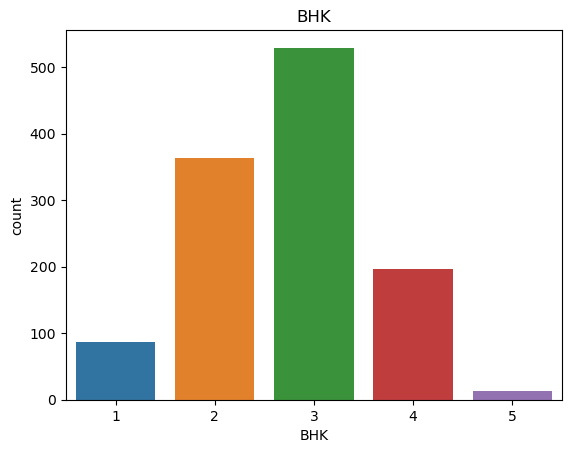

In [19]:
sns.countplot(x = 'BHK', data = df).set_title('BHK')

<Axes: xlabel='Area_Yards', ylabel='Price'>

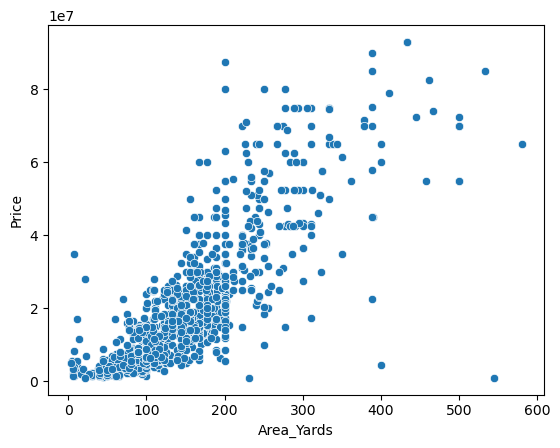

In [20]:
sns.scatterplot(x = 'Area_Yards', y = 'Price', data = df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Rohini Sector'),
  Text(1, 0, 'Lajpat Nagar'),
  Text(2, 0, 'Dwarka Sector'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Vasant Kunj'),
  Text(5, 0, 'Shahdara'),
  Text(6, 0, 'Paschim Vihar'),
  Text(7, 0, 'Alaknanda'),
  Text(8, 0, 'Vasundhara Enclave'),
  Text(9, 0, 'Punjabi Bagh'),
  Text(10, 0, 'Kalkaji')])

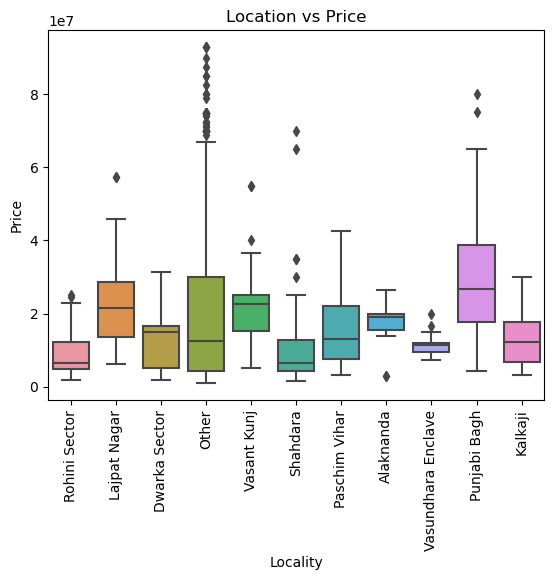

In [21]:
sns.boxplot(x='Locality', y='Price', data=df).set_title('Location vs Price')
plt.xticks(rotation=90)

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = ['Furnishing', 'Locality', 'Status', 'Transaction', 'Type']

for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Furnishing [1 0 2]
Locality [ 7  3  1  4  9  8  5  0 10  6  2]
Status [1 0]
Transaction [0 1]
Type [1 0]


In [23]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df[['Area', 'Price', 'Per_Sqft', 'Area_Yards']] = min_max.fit_transform(df[['Area', 'Price', 'Per_Sqft', 'Area_Yards']])

In [24]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_Yards
0,0.148690,3,2.0,1,7,1.0,0.059783,1,0,1,0.097173,0.148690
1,0.139060,2,2.0,1,7,1.0,0.043478,1,0,0,0.076565,0.139060
2,0.177581,2,2.0,0,7,1.0,0.157609,1,1,0,0.076565,0.177581
3,0.110169,2,2.0,1,7,1.0,0.034783,1,1,1,0.076565,0.110169
4,0.119800,2,2.0,1,7,1.0,0.056522,1,0,1,0.076565,0.119800


In [25]:
from sklearn.model_selection import train_test_split

# Assuming df has been defined and 'Per_Sqft' and 'Price' columns have been dropped
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price', axis=1), df['Price'], test_size=0.2, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest Regressor Object
rfr = RandomForestRegressor()
rfr

RandomForestRegressor()

In [27]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
rfr.score(X_train, y_train)*100

97.77483668026838

In [29]:
r_pred = rfr.predict(X_test)

In [30]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop=True, inplace=True)
dfr.head(5)

,Actual,Predicted
0,0.190217,0.243120
1,0.597826,0.519511
2,0.076087,0.086565
3,0.009239,0.006984
4,0.028261,0.024359


C:\Users\nikee\AppData\Local\Temp\ipykernel_52352\3186406459.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dfr['Actual'], color='b', label='Actual Price', hist=False, kde_kws={'linestyle': '-', 'linewidth': 2})
C:\Users\nikee\AppData\Local\Temp\ipykernel_52352\3186406459.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/

<Axes: xlabel='Predicted', ylabel='Density'>

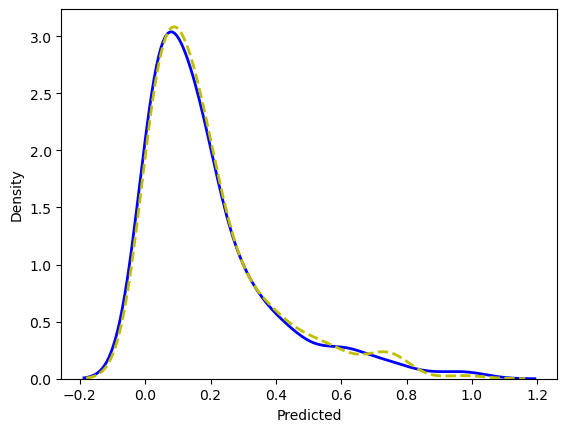

In [31]:
ax = sns.distplot(dfr['Actual'], color='b', label='Actual Price', hist=False, kde_kws={'linestyle': '-', 'linewidth': 2})
sns.distplot(dfr['Predicted'], color='y', label='Predicted Price', ax=ax, hist=False, kde_kws={'linestyle': '--', 'linewidth': 2})

In [32]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [33]:
print("R2 Score: ", r2_score(y_test, r_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, r_pred)))

R2 Score:  0.9229777356378508
Mean Squared Error:  0.0028275756689031925
Mean Absolute Error:  0.03078763244428205
Root Mean Squared Error:  0.05317495339822304
